# Problem Statement

The company is experiencing a high churn rate (customers leaving their services), which is leading to significant revenue loss.
The goal is to build a machine learning classification model that can predict whether a customer is likely to churn (leave) or stay,
based on historical data such as usage behavior, demographics, subscription plan, support interaction, and payment history.

Objective:
Identify key features that contribute to churn (e.g., high monthly charges, low customer service score).
Build and train a classification model to predict churn (0 = Not Churn, 1 = Churn).
Help the business proactively retain customers by targeting high-risk churn customers.

In [10]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [12]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


# Exploratory Data Analysis (EDA)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [18]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [21]:
df.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [28]:
df.shape

(440833, 12)

In [30]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [32]:
#check nan value
df["CustomerID"].isna().sum()

1

In [34]:
#Drop null value
df.dropna(inplace=True)

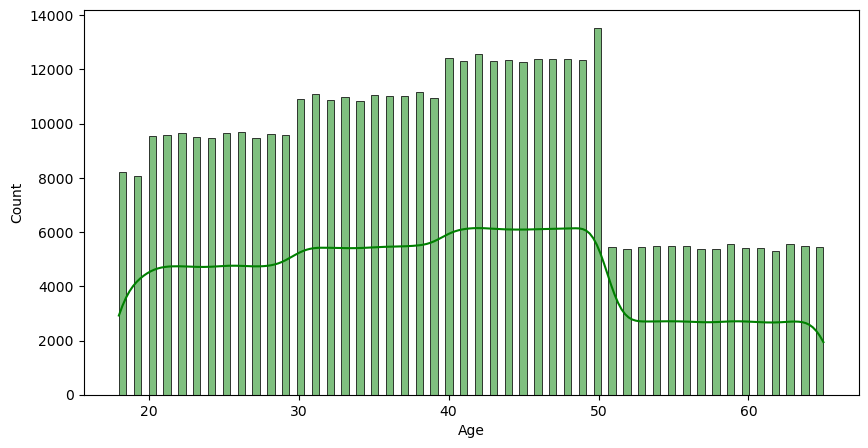

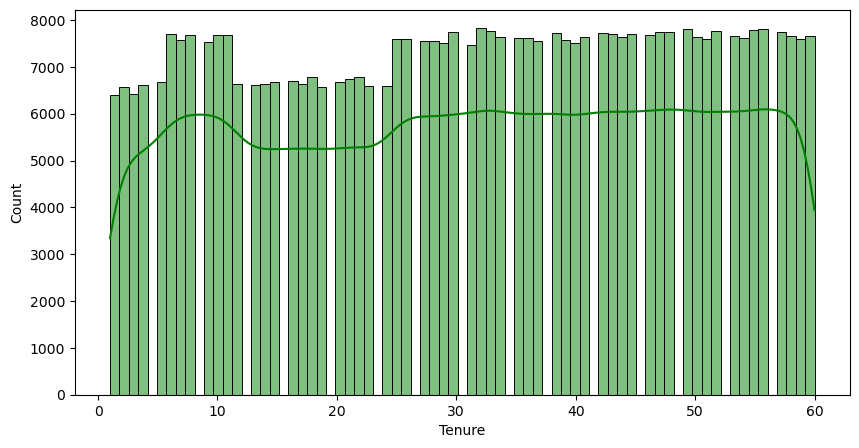

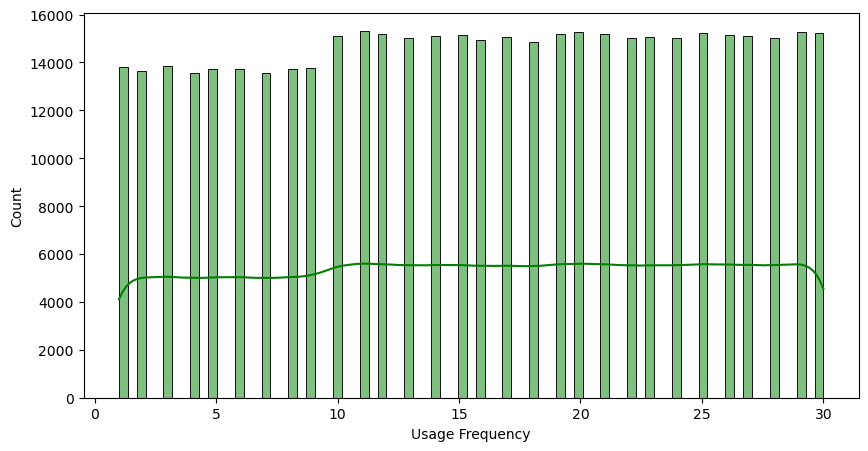

In [36]:
#distribution
column = [ 'Age','Tenure', 'Usage Frequency']
for i in column:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i],kde=True, color="green")
    plt.show()

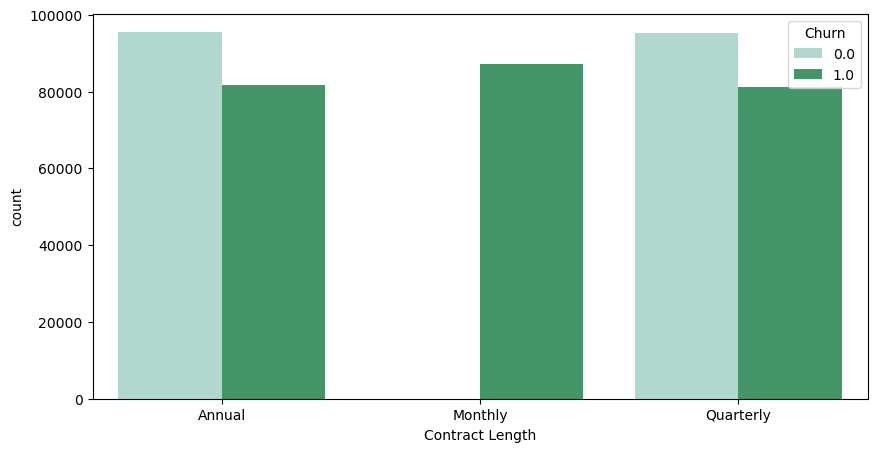

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Contract Length"], hue="Churn", data=df, palette="BuGn")
plt.show()

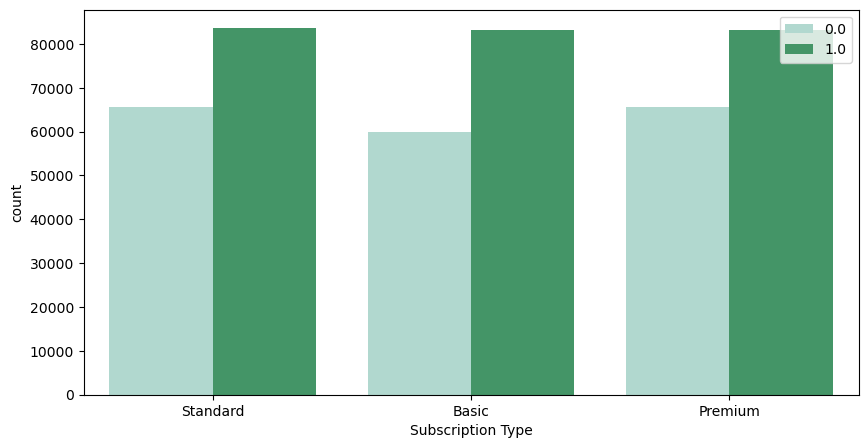

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Subscription Type"], hue="Churn", data=df, palette="BuGn")
plt.legend(loc=1)
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\2821547838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y= df["Total Spend"], data=df, palette="BuGn")


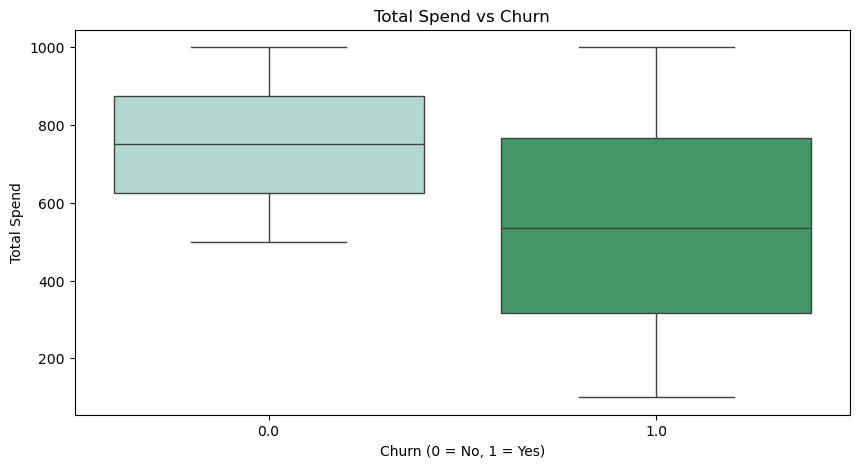

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Churn"], y= df["Total Spend"], data=df, palette="BuGn")
plt.title('Total Spend vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()

In [40]:
#change dtype
df["CustomerID"] = df["CustomerID"].astype(int)

C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\2515167848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(A,palette="BuGn")


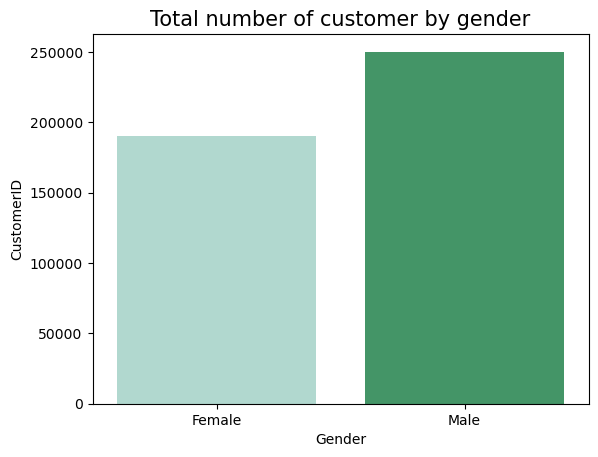

In [41]:
#How many customer by gender
A = df.groupby("Gender")["CustomerID"].count()
sns.barplot(A,palette="BuGn")
plt.title("Total number of customer by gender", fontsize=15)
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\1795076929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(A,palette="BuGn")


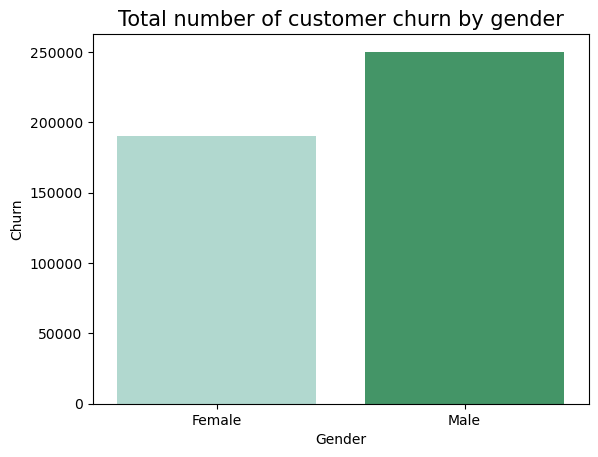

In [42]:
#How many churn customer by gender
A = df.groupby("Gender")["Churn"].count()
sns.barplot(A,palette="BuGn")
plt.title("Total number of customer churn by gender", fontsize=15)
plt.show()

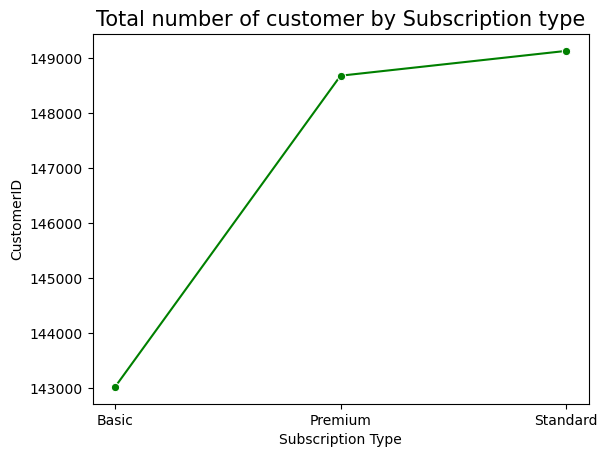

In [43]:
A = df.groupby("Subscription Type")["CustomerID"].count()
sns.lineplot(A,color="green", marker="o")
plt.title("Total number of customer by Subscription type", fontsize=15)
plt.show()

In [44]:
df["Total Spend"] = df["Total Spend"].astype(int)

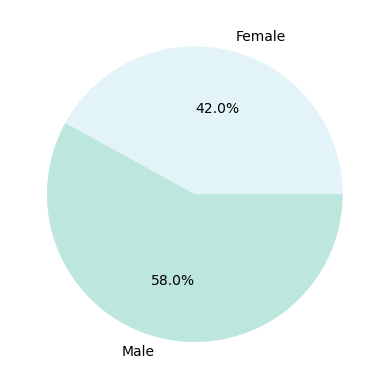

In [45]:
#How much spend money by gender
spend = df.groupby("Gender")["Total Spend"].sum()
colors = sns.color_palette("BuGn")[0:2]
plt.pie(spend, autopct="%.1f%%",labels=spend.index,colors=colors)
plt.show()

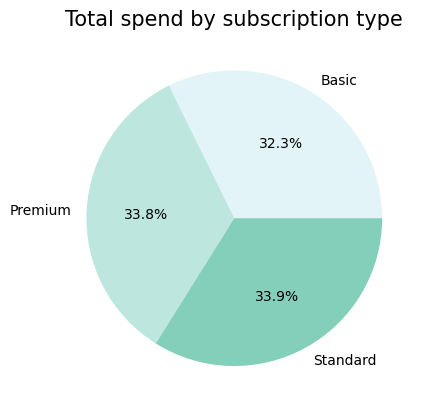

In [46]:
#Total Spend by Subscription Type
s = df.groupby("Subscription Type")["Total Spend"].sum()
colors = sns.color_palette("BuGn")[0:3]
plt.pie(s, autopct="%.1f%%", labels=s.index, colors=colors)
plt.title("Total spend by subscription type", fontsize=15)
plt.show()

In [47]:
df["Payment Dealy"] = df["Payment Delay"].astype(int)

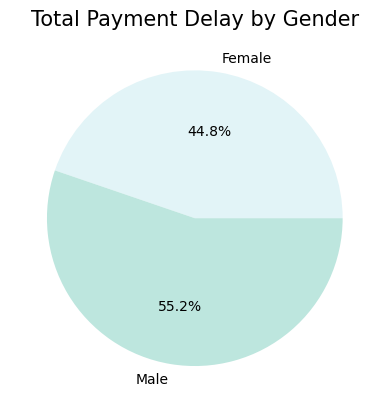

In [48]:
#Gender by payment delay
A = df.groupby("Gender")["Payment Delay"].sum()
colors = sns.color_palette("BuGn")[0:2]
plt.pie(A, autopct="%.1f%%", labels=A.index, colors=colors)
plt.title("Total Payment Delay by Gender", fontsize=15)
plt.show()

In [49]:
# Define age ranges (bins) and labels
bins = [0, 18, 25, 35, 45, 60, 100]  # You can customize these
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']

# Create a new column 'AgeGroup' based on Age
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\1006812422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  A = df.groupby("AgeGroup")["Churn"].count().sort_values(ascending=True)
C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\1006812422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(A,palette="BuGn")


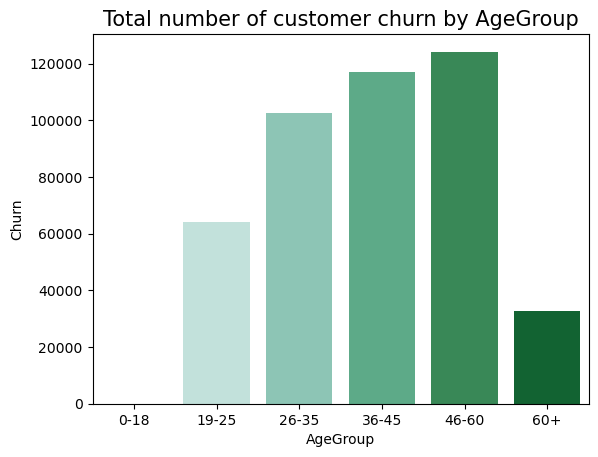

In [51]:
A = df.groupby("AgeGroup")["Churn"].count().sort_values(ascending=True)
sns.barplot(A,palette="BuGn")
plt.title("Total number of customer churn by AgeGroup", fontsize=15)
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\2918316781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  A = df.groupby("AgeGroup")["Total Spend"].sum().sort_values(ascending=True)


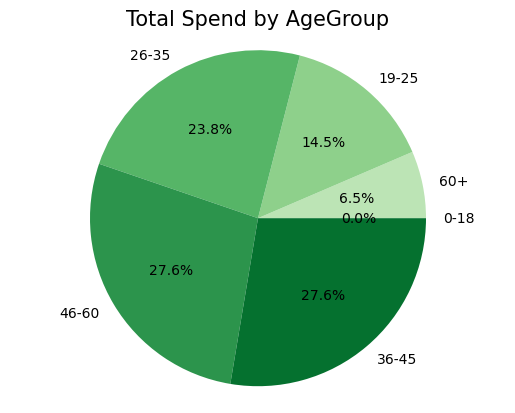

In [52]:
A = df.groupby("AgeGroup")["Total Spend"].sum().sort_values(ascending=True)
colors = sns.color_palette("Greens", len(A))
plt.pie(A, autopct="%.1f%%", labels=A.index, colors=colors)
plt.title("Total Spend by AgeGroup", fontsize=15)
plt.axis("equal") 
plt.show()

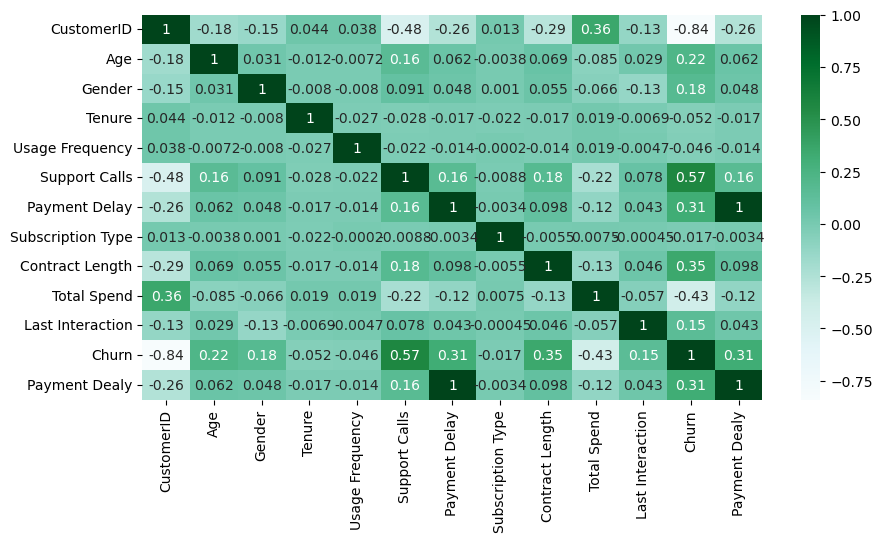

In [167]:
a = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="BuGn")
plt.show()

# Feature Engineering

In [54]:
df = df[['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn',
       'Payment Dealy']]

In [55]:
df["Gender"] = df["Gender"].replace({"Male":0, "Female":1})
df["Subscription Type"] = df["Subscription Type"].replace({"Basic":0, "Premium":1, "Standard":2})
df["Contract Length"] = df["Contract Length"].replace({"Annual":0, "Quarterly":1, "Monthly":2})

C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\3417982914.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male":0, "Female":1})
C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\3417982914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].replace({"Male":0, "Female":1})
C:\Users\soniv\AppData\Local\Temp\ipykernel_31184\3417982914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

# Model Building 

In [57]:
X = df.drop(columns=["Churn"])
Y = df["Churn"]

In [58]:
#traning data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(352665, 12) (88167, 12) (352665,) (88167,)


In [60]:
Y_test

159565    1.0
127464    1.0
22398     1.0
99337     1.0
300997    0.0
         ... 
285007    0.0
39267     1.0
397190    0.0
136393    1.0
326974    0.0
Name: Churn, Length: 88167, dtype: float64

# Model selection Logistic Regression 

In [62]:
from sklearn.linear_model import LogisticRegression

In [129]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')

In [130]:
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [131]:
y_pred = lr.predict(X_test)

In [132]:
#Measuring the Model Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.9286354304898659
classification_report               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     40651
         1.0       0.91      0.96      0.94     47516

    accuracy                           0.93     88167
   macro avg       0.93      0.93      0.93     88167
weighted avg       0.93      0.93      0.93     88167

confusion_matrix [[36211  4440]
 [ 1852 45664]]


# K-Nearest Neighbors (KNN) Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
k = KNeighborsClassifier(n_neighbors=3)

In [71]:
k.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
y_pred = k.predict(X_test)

In [73]:
#Measuring Model Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.9899735728787414
classification_report               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     37505
         1.0       1.00      0.99      0.99     50662

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



# Support Vector Machine (SVM) Model

In [75]:
from sklearn.svm import SVC

In [176]:
svm = SVC()

In [178]:
svm.fit(X_train, Y_train)

SVC()

In [179]:
y_pred = svm.predict(X_test)

In [180]:
#Measuring the Model Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.9913686526705003
classification_report               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     37352
         1.0       1.00      0.99      0.99     50815

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



# Naive Bayes Model 

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
gb = GaussianNB()

In [84]:
gb.fit(X_train, Y_train)

GaussianNB()

In [85]:
y_pred = gb.predict(X_test)

In [86]:
#Measuring the Model Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.9708734560549865
classification_report               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     39167
         1.0       0.96      0.99      0.97     49000

    accuracy                           0.97     88167
   macro avg       0.97      0.97      0.97     88167
weighted avg       0.97      0.97      0.97     88167



# Decision Tree Model 

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dc = DecisionTreeClassifier()

In [91]:
dc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [92]:
y_pred = dc.predict(X_test)

In [94]:
#Measuring the model Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.9997844998695657
classification_report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38072
         1.0       1.00      1.00      1.00     50095

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

